In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

The data in this project is New York State quarterly wage data. I came across this data on Kaggle, but it originally comes from data.ny.gov. I intend to examine the data to look at and compare each region's total wage changes over time. 

In [5]:
nyqrt = pd.read_csv('Desktop/NYquarterly.csv')

Start getting a feel for the data...

In [6]:
nyqrt.shape

(880198, 11)

In [7]:
nyqrt.sample(3)

,Area Type,Area,Year,Quarter,NAICS,NAICS Title,Establishments,Month 1 Employment,Month 2 Employment,Month 3 Employment,Total Wage
854176,County,Westchester County,2016,3,81,"Other Services, Ex. Public Admin",5504,21363,21129,21133,201632205.0
528527,County,Niagara County,2018,1,2389,Other Specialty Trade Contractors,58,383,377,431,5292268.0
834282,County,Washington County,2012,2,31,Manufacturing,89,2692,2738,2790,33783864.0


I think I am going to look at Total Wage and see if there are trends over time.

In [8]:
nyqrt['Area Type'].unique()

array(['County', 'Workforce Investment Region',
       'Metropolitan Statistical Area', 'Micropolitan Statistical Area',
       'Balance of State', 'Labor Market Area', 'Metropolitan Division',
       'State'], dtype=object)

In [9]:
nyqrt.columns

Index(['Area Type', 'Area', 'Year', 'Quarter', 'NAICS', 'NAICS Title',
       'Establishments', 'Month 1 Employment', 'Month 2 Employment',
       'Month 3 Employment',
       'Total Wage                                                                                                                       '],
      dtype='object')

The 'Total Wage' column has a ton of white space in the name.

In [10]:
nyqrt = nyqrt.rename(str.strip, axis='columns')

In [11]:
nyqrt.columns

Index(['Area Type', 'Area', 'Year', 'Quarter', 'NAICS', 'NAICS Title',
       'Establishments', 'Month 1 Employment', 'Month 2 Employment',
       'Month 3 Employment', 'Total Wage'],
      dtype='object')

In [12]:
# This block of code combines Year and Quarter into one string to use sequentially.

nyqrt['Year'] = nyqrt['Year'].apply(str)
nyqrt['Quarter'] = nyqrt['Quarter'].apply(str)
nyqrt['yr_qrt'] = nyqrt['Year'] + 'Q' + nyqrt['Quarter']

In [13]:
nyqrt.head(3)

,Area Type,Area,Year,Quarter,NAICS,NAICS Title,Establishments,Month 1 Employment,Month 2 Employment,Month 3 Employment,Total Wage,yr_qrt
0,County,Albany County,2018,3,0,"Total, All Industries",10338,229744,230185,233904,3.221796e+09,2018Q3
1,County,Albany County,2018,3,1,"Total, All Private",9899,172824,173604,173545,2.311203e+09,2018Q3
2,County,Albany County,2018,3,11,"Agriculture, Forestry, Fishing and Hunting",17,240,258,287,2.190577e+06,2018Q3


In [14]:
#Put all the values in order by the new yr_qrt column.

nyqrt = nyqrt.sort_values(by=['yr_qrt'],ascending=True)

In [15]:
nyqrt = nyqrt.reset_index(drop=True)

In [16]:
nyqrt.shape

(880198, 12)

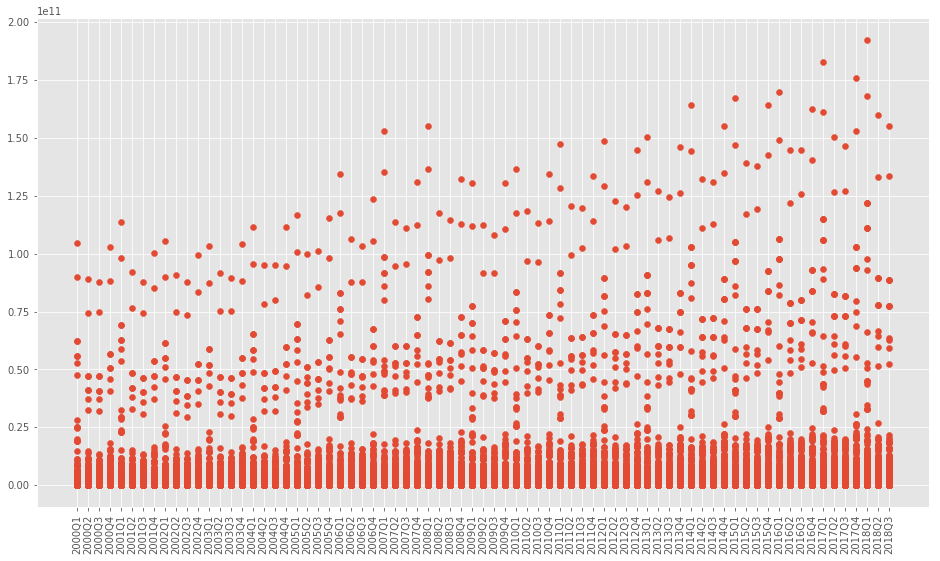

In [17]:
plt.figure(figsize=(16,9))
plt.style.use('ggplot')
plt.scatter(nyqrt['yr_qrt'], nyqrt['Total Wage'])
plt.xticks(rotation='vertical')
plt.show()

There are a lot of values here! New York is a high variance state. Most of the economic activity will come from New York City, while the surrounding areas will be significantly lower. I will group up everything by the area, then by yr_qrt.

In [18]:
area_df = nyqrt.groupby(['Area', 'yr_qrt']).sum()

In [19]:
area_df = area_df.reset_index()

In [20]:
area_df.head(3)

,Area,yr_qrt,NAICS,Establishments,Month 1 Employment,Month 2 Employment,Month 3 Employment,Total Wage
0,Albany County,2000Q1,38431,36396,839593,841407,845350,7.316169e+09
1,Albany County,2000Q2,38431,36486,849314,853631,859089,7.329170e+09
2,Albany County,2000Q3,38431,36743,842035,841292,856351,7.378292e+09


In [21]:
area_df['Area'].unique()

array(['Albany County', 'Albany-Rensselaer-Schenectady Counties',
       'Albany-Schenectady-Troy Metro Area', 'Allegany County',
       'Allegany-Cattaraugus',
       'Amsterdam, NY Micropolitan Statistical Area',
       'Auburn, NY Micropolitan Statistical Area', 'BALANCE OF STATE',
       'Batavia, NY Micropolitan Statistical Area',
       'Binghamton Metro Area', 'Bronx County', 'Broome County',
       'Broome-Tioga', 'Buffalo-Niagara Falls Metro Area',
       'Capital Region', 'Cattaraugus County', 'Cayuga County',
       'Cayuga-Cortland', 'Central New York Region', 'Chautauqua',
       'Chautauqua County', 'Chemung County', 'Chemung-Schuyler-Steuben',
       'Chenango County', 'Chenango-Delaware-Otsego', 'Clinton County',
       'Clinton-Essex-Franklin-Hamilton', 'Columbia County',
       'Columbia-Greene', 'Corning, NY Micropolitan Statistical Area',
       'Cortland County', 'Cortland, NY Micropolitan Statistical Area',
       'Delaware County', 'Dutchess', 'Dutchess County',


There are still a ton of areas. And there will still be a huge gap between rural New York and New York City. Is this data even worth exploring as a time series? I will use a lag plot to find out.

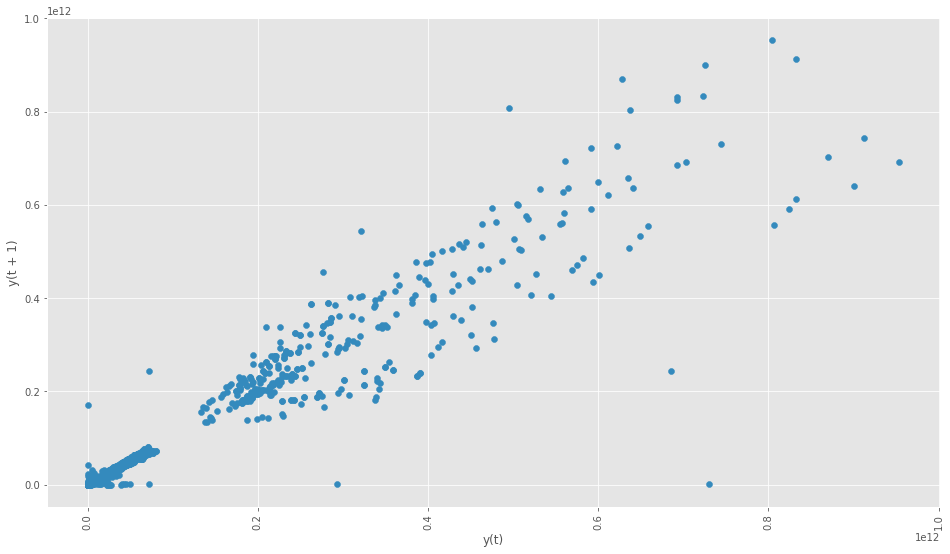

In [22]:
plt.figure(figsize=(16,9))
plt.style.use('ggplot')
pd.plotting.lag_plot(area_df['Total Wage'])
plt.xticks(rotation='vertical')
plt.show()

The lag plot looks promising.

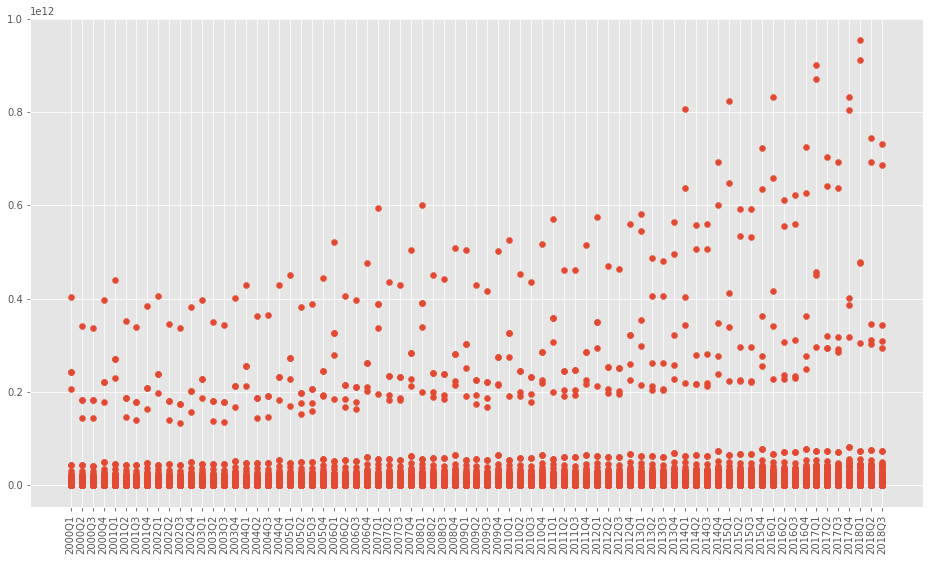

In [23]:
plt.figure(figsize=(16,9))
plt.style.use('ggplot')
plt.scatter(area_df['yr_qrt'],area_df['Total Wage'])
plt.xticks(rotation='vertical')
plt.show()

A scatter plot of all the areas will still be unworkable however, due to the huge gap between what I assume is NYC and the rest of the state. I would like to zoom in on NYC by itself and see if we can get a time series worth decomposing.

In [24]:
nyc = area_df.loc[area_df['Area']=='New York City']

In [25]:
nyc.sample(3)

,Area,yr_qrt,NAICS,Establishments,Month 1 Employment,Month 2 Employment,Month 3 Employment,Total Wage
5167,New York City,2017Q3,84860,2137154,32826002,32758408,32955610,6.367755e+11
5157,New York City,2015Q1,85284,2043090,30766928,30930702,31103600,8.239404e+11
5152,New York City,2013Q4,45138,1495504,23361207,23579933,23665363,4.956602e+11


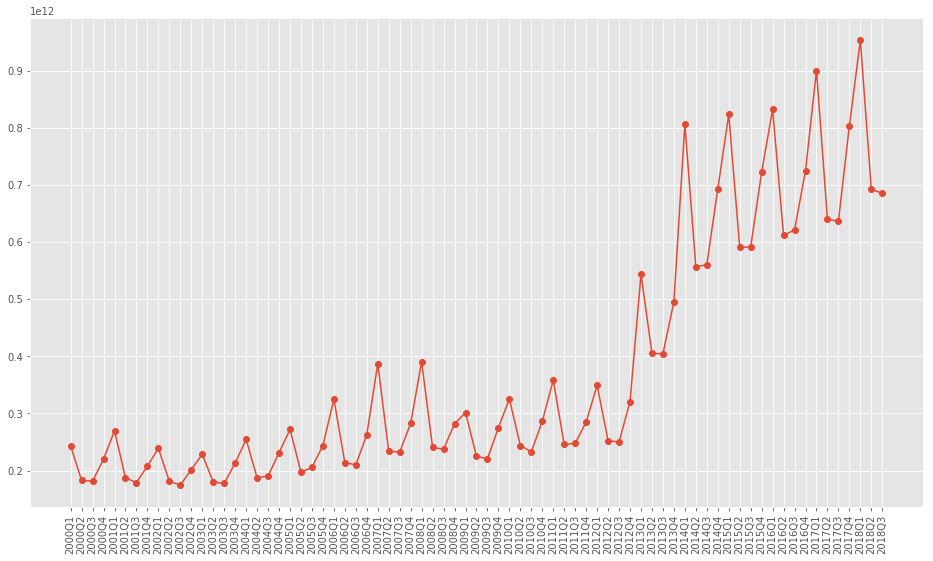

In [26]:
plt.figure(figsize=(16,9))
plt.style.use('ggplot')
plt.plot(nyc['yr_qrt'],nyc['Total Wage'],'-o')
plt.xticks(rotation='vertical')
plt.show()

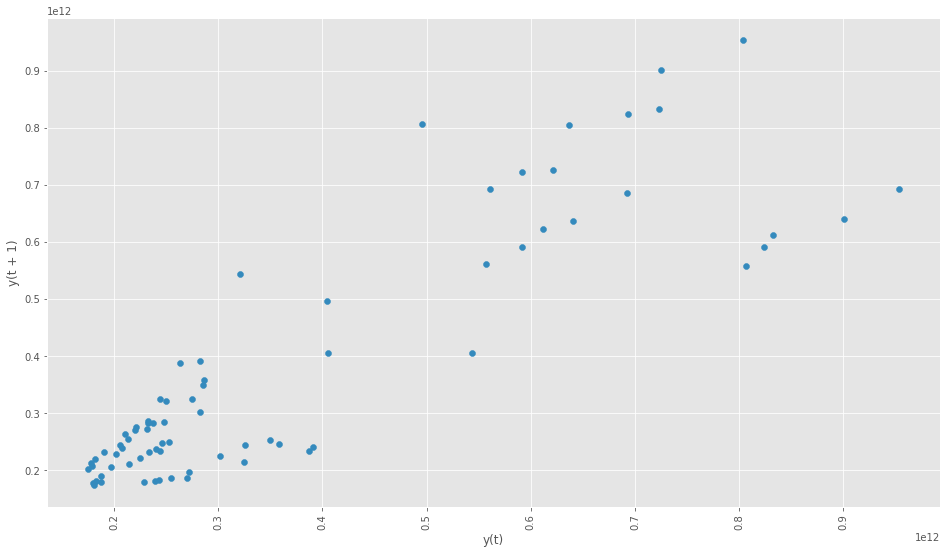

In [27]:
plt.figure(figsize=(16,9))
plt.style.use('ggplot')
pd.plotting.lag_plot(nyc['Total Wage'])
plt.xticks(rotation='vertical')
plt.show()

The lag plot has some linearity to it. The plot of the data looks like there is both cyclical and long term trends. This is a good candidate to decompose.

In [28]:
nyc = nyc.set_index('yr_qrt')

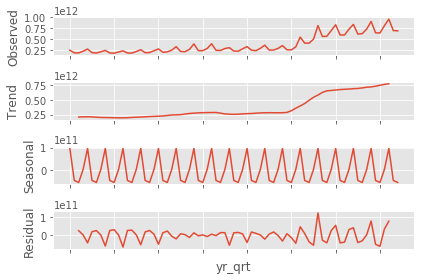

In [29]:
result = seasonal_decompose(nyc['Total Wage'], model='additive', freq=4)
result.plot()
plt.show()

Now, I will write a function so that I can easily do this for any of the areas in the state.

In [30]:
def areadecomp(area):
    df = area_df.loc[area_df['Area']==area]
    df = df.set_index('yr_qrt')
    result = seasonal_decompose(df['Total Wage'], model='additive', freq=4)
    result.plot()
    plt.show()

In [31]:
area_df['Area'].unique()

array(['Albany County', 'Albany-Rensselaer-Schenectady Counties',
       'Albany-Schenectady-Troy Metro Area', 'Allegany County',
       'Allegany-Cattaraugus',
       'Amsterdam, NY Micropolitan Statistical Area',
       'Auburn, NY Micropolitan Statistical Area', 'BALANCE OF STATE',
       'Batavia, NY Micropolitan Statistical Area',
       'Binghamton Metro Area', 'Bronx County', 'Broome County',
       'Broome-Tioga', 'Buffalo-Niagara Falls Metro Area',
       'Capital Region', 'Cattaraugus County', 'Cayuga County',
       'Cayuga-Cortland', 'Central New York Region', 'Chautauqua',
       'Chautauqua County', 'Chemung County', 'Chemung-Schuyler-Steuben',
       'Chenango County', 'Chenango-Delaware-Otsego', 'Clinton County',
       'Clinton-Essex-Franklin-Hamilton', 'Columbia County',
       'Columbia-Greene', 'Corning, NY Micropolitan Statistical Area',
       'Cortland County', 'Cortland, NY Micropolitan Statistical Area',
       'Delaware County', 'Dutchess', 'Dutchess County',


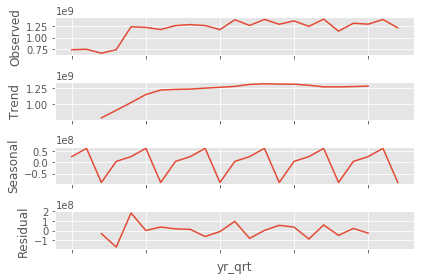

In [32]:
areadecomp('Oswego')

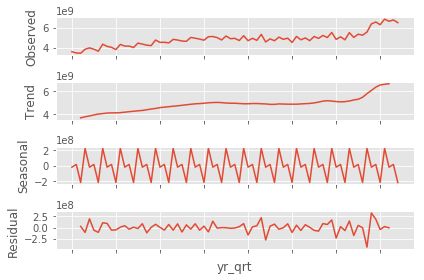

In [33]:
areadecomp('Dutchess County')

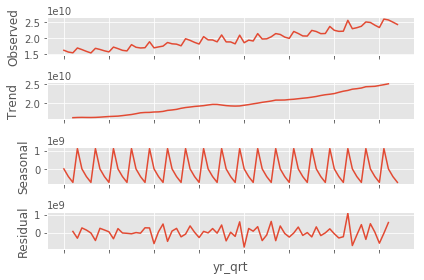

In [34]:
areadecomp('Buffalo-Niagara Falls Metro Area')